# Assignment 5
---
### 1.	Pattern recognition

In this assignment, you are asked to design a pattern recognition neural network to recognize handwriting digits (0-9). For example, the following sample represents a handwriting 9.

    00000000000000000000000000000000
    00000000000001111100000000000000
    00000000000001111100000000000000
    00000000001111111110000000000000
    00000000011111111111111000000000
    00000000011111111111111100000000
    00000000111111111111111100000000
    00000000111111111111111110000000
    00000001111111100001111110000000
    00000001111111000001111111000000
    00000001111110000001111111000000
    00000001111110000000111111000000
    00000011111100000001111110000000
    00000001111111000001111110000000
    00000001111111110001111110000000
    00000001111111111111111110000000
    00000000001111111111111110000000
    00000000001111111111111110000000
    00000000000111111111111110000000
    00000000000000111001111110000000
    00000000000000000000111111000000
    00000000000000000000111100000000
    00000000000000000000111100000000
    00000000000000000000111100000000
    00000000000000000001111110000000
    00000000000000000001111110000000
    00000000001111100001111100000000
    00000000001111111111111100000000
    00000000001111111111111100000000
    00000000011111111111111000000000
    00000000000011111111111000000000
    00000000000000001111110000000000

The data file can be downloaded from

https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits-orig.windep.Z


The data file contains 1797 instances from 43 writers. The data is prepared by NIST to extract normalized bitmaps of handwritten digits from a preprinted form.

***Task 1***: Encoding (50 pts)

Unzip the data file from the link. Encode the data into input and target files for neural network training.

***Task 2***: Neural Network Training (50 pts)

Train the neural network (pattern net) based on your input/output files. Repeat with 10, 100, and 500 hidden nodes. Report your testing, training, and validation accuracy and provide analysis.

***Bonus***: (10 pts)

Using 1024 features for neural network is very cumbersome. Is there a way to reduce the number of features? If you have an idea, show me how effective it is.


## ***Solution***
### ***Task 1***: Encoding (50 pts)

Unzip the data file from the link. Encode the data into input and target files for neural network training.

#### ***Manual analysis***

After manually analyzing the dataset file each digit takes around 33 lines.

The label of the image is given on 34th line.


In [2]:
#--- Import libraries
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import *             
from sklearn.model_selection import train_test_split      #--- Test Train Split

In [5]:
#--- helper functions
def image2Vector(image):
  """
  Argument:
  image -- a numpy array of shape (length, height, depth)  
  Returns:
  v -- a vector of shape (length*height*depth, 1)
  """  
  v = image.reshape(image.shape[0]*image.shape[1],1)
  #print(v.shape)
  return v

#--- Plot the accuracy and loss
def plotTrainValMetrics(history, nodes):
    accTitle = 'model accuracy for '+str(nodes)+' Nodes'
    lossTitle = 'model loss for '+str(nodes)+' Nodes'
    # summarize history for accuracy
    plt.figure(figsize=(12,6))
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(accTitle)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

  # summarize history for loss
    plt.figure(figsize=(12,6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(lossTitle)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [6]:
#--- Task 1
#--- Unzip the data file from the link. Encode the data into input and target files for neural network training.
zipPath = './optdigits-orig.windep.Z'
filePath = './optdigits-orig.windep'
inputfilesPath = './input_data.csv'
targetfilesPath = './target_data.csv'

In [7]:
#------ open and read the file
dg_file=open(filePath,'r')
dg_file.seek(22)

data = []
image = []
images = []
ivec = []
labels = []
count = 1
for line in dg_file.readlines():
    if(len(line)==33):#--- input data
        #print(line)
        arr = []
        line = line.rstrip('\n')
        for c in line:
            arr.append(int(c))
        image.append(arr)
        #count+=1
    elif(len(line)==3): #--- Label
        # print('----------- IN LABEL-------')
        # print(count)
        digit=str(line)
        digit=digit.strip()
        labels.append(int(digit))
        data = np.array(image)
        temp = image2Vector(data)
        ivec.append(temp)
        image = []
        data = []
        count = 1
        #break
        #print(digit)
    count+=1

ivec = np.array(ivec)
labels = np.array(labels).T

In [8]:
print('No of Input Samples : ',len(ivec)) 
print('No of Target Samples : ',len(labels))
#---- Shapes of the arrays
print('Shape of Inputs : ',ivec.shape)
print('Shape of Targets : ',labels.shape)

No of Input Samples :  1797
No of Target Samples :  1797
Shape of Inputs :  (1797, 1024, 1)
Shape of Targets :  (1797,)


Shape of sample " 1795 " :  (1024, 1)
Length of sample " 1795 " :  1024
Label of sample " 1795 " :  9
Below is the image of label


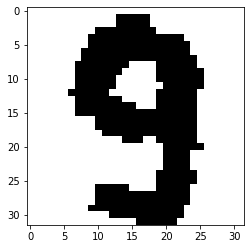

In [9]:
#---- Validate the data
index = 1795
print('Shape of sample "',index,'" : ',ivec[index].shape)
print('Length of sample "',index,'" : ',len(ivec[index]))
print('Label of sample "',index,'" : ',labels[index])
#--- displaying image from encoded data
print('Below is the image of label')
mat =ivec[index].reshape(32,32)
#print(mat)    #--- Matrix of image 32*32
plt.imshow(mat, cmap=plt.cm.binary)
plt.show()

In [10]:
%%time
#----- Saving the labels(Targets)
labelsdf = pd.DataFrame(data = labels, columns=['class'])
labelsdf.to_csv(targetfilesPath)
#labelsdf

#----- Saving the Features(Inputs)
inputsdf = pd.DataFrame(columns=range(len(ivec[0])))
for i in range(len(ivec)):                        #---- Create a dataframe by adding each image sample
    inputsdf[i] = ivec[i].reshape(ivec[i].shape[0])
inputsdf = inputsdf.T                             #---- Transpose the matrix to get all the samples rowise
inputsdf.to_csv(inputfilesPath)
#inputsdf

CPU times: user 16.9 s, sys: 398 ms, total: 17.3 s
Wall time: 17.4 s


In [11]:
inputsdf.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
labelsdf.head()

,class
0,0
1,1
2,2
3,3
4,4


The below image is assigned to  class    8
Name: 1794, dtype: int64


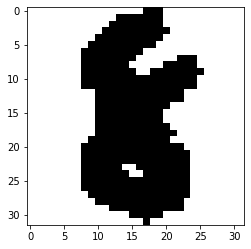

In [13]:
#---- validating the data
index = 1794
mat = np.array(inputsdf.loc[index]).reshape(32,32)
print('The below image is assigned to ',labelsdf.loc[index])
plt.imshow(mat, cmap=plt.cm.binary)
plt.show()

### ***Task 2***: Neural Network Training (50 pts)

Train the neural network (pattern net) based on your input/output files. Repeat with 10, 100, and 500 hidden nodes. Report your testing, training, and validation accuracy and provide analysis.

In [14]:
#----- Test train Split
#----- 80% - Train, 10% - Validation, 10% - Test
x_train,x_val,y_train, y_val = train_test_split(inputsdf,labelsdf,test_size=0.2) #--- dividing Data into 80 % Train and 20% validation
x_val,x_test,y_val, y_test = train_test_split(x_val,y_val,test_size=0.5) #--- further dividing validation into 10 % validation and 10% test
print('Shape of X_Train : ',x_train.shape)
print('Shape of Y_Train : ',y_train.shape)
print('Shape of X_Val : ',x_val.shape)
print('Shape of y_Val : ',y_val.shape)
print('Shape of X_Test : ',x_test.shape)
print('Shape of y_Test : ',y_test.shape)

Shape of X_Train :  (1437, 1024)
Shape of Y_Train :  (1437, 1)
Shape of X_Val :  (180, 1024)
Shape of y_Val :  (180, 1)
Shape of X_Test :  (180, 1024)
Shape of y_Test :  (180, 1)


In [15]:
#---- Please provide as model inputs either a single array or a list of arrays For Keras
trainx = np.array(x_train)
trainy = np.array(y_train)
valx = np.array(x_val)
valy = np.array(y_val)
testx = np.array(x_test)
testy = np.array(y_test)

In [16]:
#---- scaling the values -- Normalizing
trainx = tf.keras.utils.normalize(trainx, axis=1)
valx = tf.keras.utils.normalize(valx, axis=1)
testx = tf.keras.utils.normalize(testx, axis=1)
trainy = tf.keras.utils.normalize(trainy, axis=1)
valy = tf.keras.utils.normalize(valy, axis=1)
testy = tf.keras.utils.normalize(testy, axis=1)

### ***Building a Model***

In [17]:
"""
nH - Number of Hidden Nodes
"""
def getModel(nH):
    #---- Building the model
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten()) #----- flatten the input data before gettting to hiddenlayer
    model.add(tf.keras.layers.Dense(nH,activation= tf.nn.relu)) #--- dense layer is hidden layer with pararmeters nH neurons with relu activation function 
    model.add(tf.keras.layers.Dense(10,activation= tf.nn.softmax))
    return model

# #---- Parameters for training
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics = ['accuracy'])

# #---- Train the model
# model.fit(trainx, trainy, epochs=10)

#### ***For 10 Hidden Nodes***

In [18]:
model1 = getModel(10)
#---- Parameters for training
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
#---- Train the model
history1 = model1.fit(trainx, trainy, validation_data=(valx,valy), epochs=3)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 1437 samples, validate on 180 samples
Epoch 1/3
1437/1437 [==============================] - 0s 287us/sample - loss: 1.8848 - acc: 0.6945 - val_loss: 1.3717 - val_acc: 0.9222
Epoch 2/3
1437/1437 [==============================] - 0s 94us/sample - loss: 0.9516 - acc: 0.8977 - val_loss: 0.5686 - val_acc: 0.9222
Epoch 3/3
1437/1437 [==============================] - 0s 82us/sample - loss: 0.4934 - acc: 0.8977 - val_loss: 0.3622 - val_acc: 0.9222


In [19]:
#------ Check for overfitting
test_loss, test_acc = model1.evaluate(testx,testy)
print('--> Testing Loss : ',test_loss,'. Testing Accuracy : ',test_acc)

180/180 [==============================] - 0s 62us/sample - loss: 0.4025 - acc: 0.9056
--> Testing Loss :  0.40253809955384995 . Testing Accuracy :  0.90555555


In [22]:
##--- saving and loading the model back
model1_path = './tc01-10-03.model'
model1.save(model1_path)
##---- reload the model
#new_model = tf.keras.models.load_model(model1_path)
##---- Predicting the model
#predictions = new_model.predict([testx])

#### ***For 100 Hidden Nodes***

In [23]:
model2 = getModel(100)
#---- Parameters for training
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
#---- Train the model
history2 = model2.fit(trainx, trainy, validation_data=(valx,valy), epochs=3)

Train on 1437 samples, validate on 180 samples
Epoch 1/3
1437/1437 [==============================] - 0s 346us/sample - loss: 0.9300 - acc: 0.8664 - val_loss: 0.2505 - val_acc: 0.9222
Epoch 2/3
1437/1437 [==============================] - 0s 104us/sample - loss: 0.2200 - acc: 0.9005 - val_loss: 0.1233 - val_acc: 0.9444
Epoch 3/3
1437/1437 [==============================] - 0s 107us/sample - loss: 0.1122 - acc: 0.9694 - val_loss: 0.0637 - val_acc: 0.9944


In [24]:
#------ Check for overfitting
test_loss, test_acc = model2.evaluate(testx,testy)
print('--> Testing Loss : ',test_loss,'. Testing Accuracy : ',test_acc)

180/180 [==============================] - 0s 64us/sample - loss: 0.0822 - acc: 0.9889
--> Testing Loss :  0.08220814814170202 . Testing Accuracy :  0.98888886


In [26]:
##--- saving and loading the model back
model2_path = './tc02-100-03.model'
model2.save(model2_path)
##---- reload the model
#new_model = tf.keras.models.load_model(model_path)
##---- Predicting the model
#predictions = new_model.predict([testx])

#### ***For 500 Hidden Nodes***

In [27]:
model3 = getModel(500)
#---- Parameters for training
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
#---- Train the model
history3 = model3.fit(trainx, trainy, validation_data=(valx,valy), epochs=3)

Train on 1437 samples, validate on 180 samples
Epoch 1/3
1437/1437 [==============================] - 1s 480us/sample - loss: 0.5381 - acc: 0.8859 - val_loss: 0.1015 - val_acc: 0.9667
Epoch 2/3
1437/1437 [==============================] - 0s 187us/sample - loss: 0.0725 - acc: 0.9868 - val_loss: 0.0310 - val_acc: 1.0000
Epoch 3/3
1437/1437 [==============================] - 0s 171us/sample - loss: 0.0294 - acc: 0.9972 - val_loss: 0.0157 - val_acc: 1.0000


In [28]:
#------ Check for overfitting
test_loss, test_acc = model3.evaluate(testx,testy)
print('--> Testing Loss : ',test_loss,'. Testing Accuracy : ',test_acc)

180/180 [==============================] - 0s 80us/sample - loss: 0.0287 - acc: 0.9889
--> Testing Loss :  0.028749140269226498 . Testing Accuracy :  0.98888886


In [29]:
##--- saving and loading the model back
model3_path = './tc03-500-03.model'
model3.save(model3_path)
##---- reload the model
#new_model = tf.keras.models.load_model(model_path)
##---- Predicting the model
#predictions = new_model.predict([testx])

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


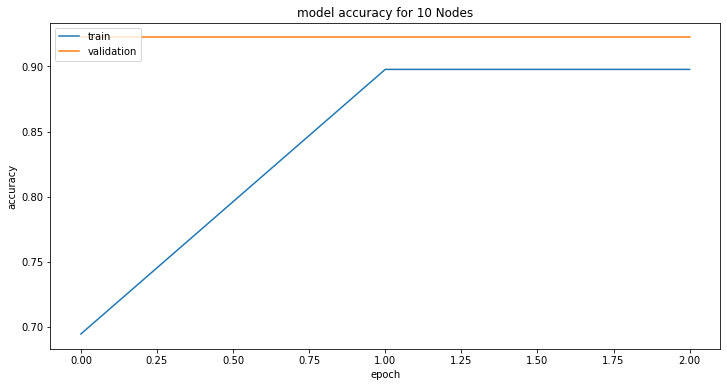

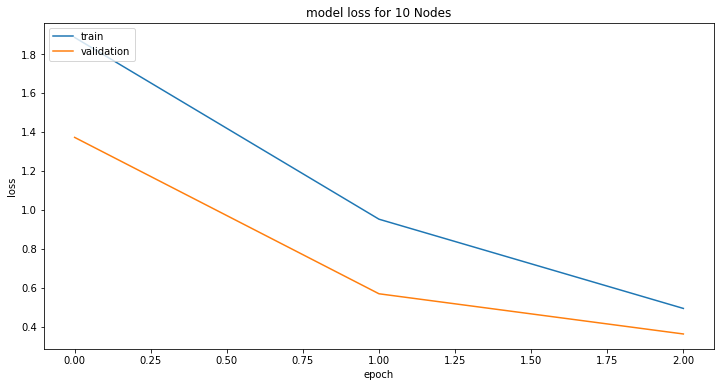

In [30]:
print(history1.history.keys())
plotTrainValMetrics(history1, 10)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


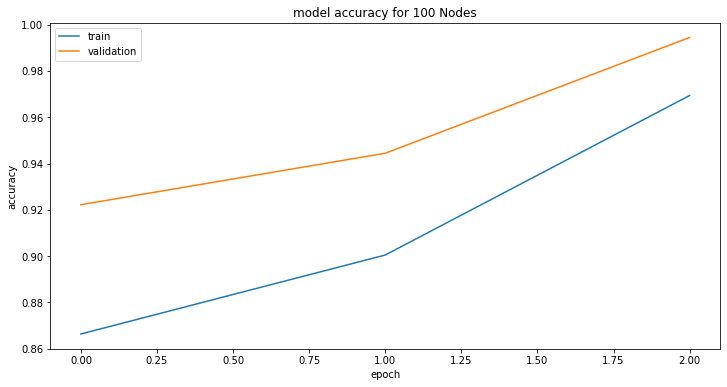

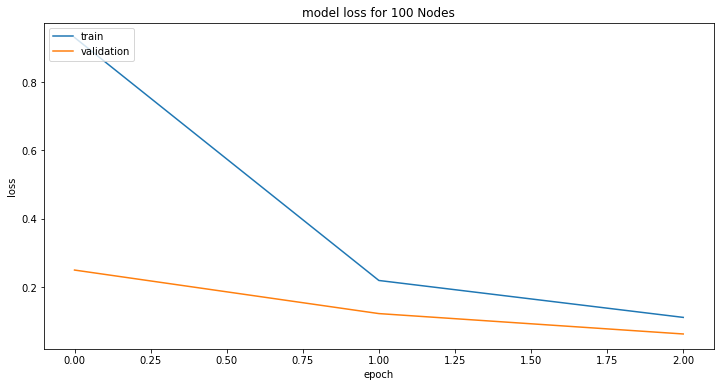

In [31]:
print(history2.history.keys())
plotTrainValMetrics(history2, 100)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


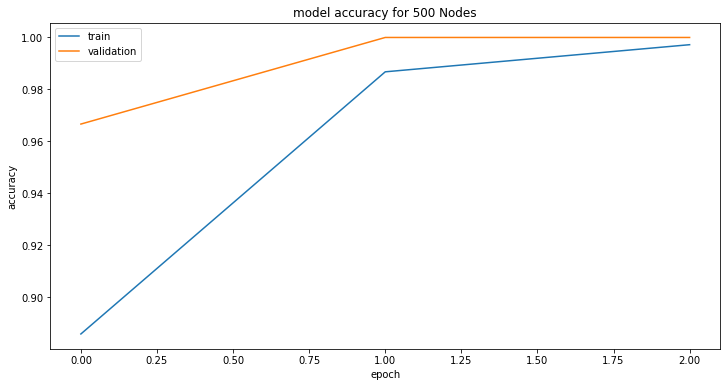

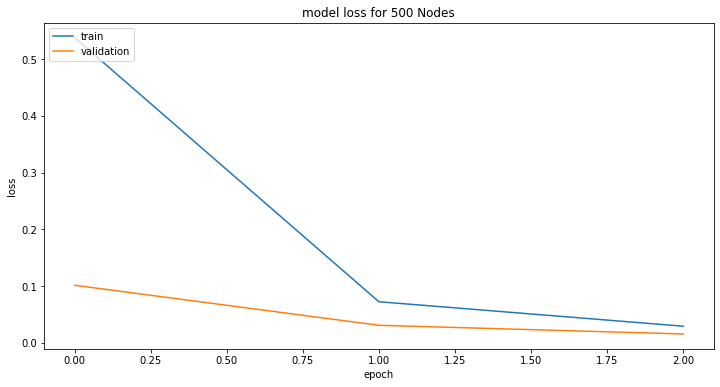

In [32]:
print(history3.history.keys())
plotTrainValMetrics(history3, 500)

### ***Analysis***

Below table gives us the analysis of the above used models when we use 10, 100, 500 hidden nodes for 3 epochs. 

***Model Loss***

<table>
  <tr>
    <th rowspan="2"> Loss </th> 
    <th colspan="3"> No of Hidden Nodes </th>
  </tr>
  <tr>
    <th>10</th>
    <th>100</th>
    <th>500</th>
  </tr>
  <tr>
    <td>Training</td>
    <td>0.4617</td>
    <td>0.1252</td>
    <td>0.0285</td>
  </tr>
  <tr>
    <td>Validation</td>
    <td>0.4389</td>
    <td>0.0926</td>
    <td>0.0220</td>
  </tr>
  <tr>
    <td>testing</td>
    <td>0.4037</td>
    <td>0.1035</td>
    <td>0.0364</td>
  </tr>
</table>


***Model Accuracy***

<table>
  <tr>
    <th rowspan="2"> Accuracy (%) </th> 
    <th colspan="3"> No of Hidden Nodes </th>
  </tr>
  <tr>
    <th>10</th>
    <th>100</th>
    <th>500</th>
  </tr>
  <tr>
    <td>Training</td>
    <td>90.19</td>
    <td>95.48</td>
    <td>99.65</td>
  </tr>
  <tr>
    <td>Validation</td>
    <td>88.89</td>
    <td>98.33</td>
    <td>99.44</td>
  </tr>
  <tr>
    <td>testing</td>
    <td>90.55</td>
    <td>98.33</td>
    <td>99.44</td>
  </tr>
</table>

we can see that as we increased the nodes from 10 to 100 we get a better accuracy. so we can see that we can improve the perfromance of the network by increasing the number of nodes.

we can see from the above plots that for 3 epochs we can see that the performance of the network increases gradually from 10 to 100 nodes where as it does not make much difference when we see for 500 nodes.

### ***Observations*** 
1. we can still imporve the performance of the 10 node network by increasing the number of epochs
2. we can also reduce the features from 1024 to some lower number as the network becomes very cumber some. some of the ways are given below. 
    1. Using sliding window technique to get the features using the concept of convolutional neural network.
    2. Using maxpooling to get the important features before applyin it to the input layer.
    3. We can increase the number of hidden layers instead of increasing the hidden nodes in one layer.


Below are some of the examples of how the image features are used in real world:

***1. Convolution*** : 
<p align="center">
<img src="https://media0.giphy.com/media/i4NjAwytgIRDW/giphy.gif" width="450" height="250" /></p>

In the above demonstration, the green section resembles our 5x5x1 input image, I. The element involved in carrying out the convolution operation in the first part of a Convolutional Layer is called the Kernel/Filter, K, represented in the color yellow. We have selected K as a 3x3x1 matrix.

***2. Pooling*** : 
<div class="fig figcenter fighighlight">
  <img src="http://cs231n.github.io/assets/cnn/pool.jpeg" width="36%">
  <img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" width="59%" style="border-left: 1px solid black;">
  <div class="figcaption">
    Pooling layer downsamples the volume spatially, independently in each depth slice of the input volume. <b>Left:</b> In this example, the input volume of size [224x224x64] is pooled with filter size 2, stride 2 into output volume of size [112x112x64]. Notice that the volume depth is preserved. <b>Right:</b> The most common downsampling operation is max, giving rise to <b>max pooling</b>, here shown with a stride of 2. That is, each max is taken over 4 numbers (little 2x2 square).
  </div>
</div>

***3. Convolutional Neural Network***

  Convolutional neural network applies the concept of convolution and pooling to generate the features while reducing the dimensionality of the input image.
<p align="center">
<img src="https://mlnotebook.github.io/img/CNN/convSobel.gif" width="450" height="450" /></p>

The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

The architecture of a ConvNet is analogous to that of the connectivity pattern of Neurons in the Human Brain and was inspired by the organization of the Visual Cortex. Individual neurons respond to stimuli only in a restricted region of the visual field known as the Receptive Field. A collection of such fields overlap to cover the entire visual area.

<p align="center">
<img src="https://miro.medium.com/max/1644/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" width="750" height="450" /></p>


### Reference : 
1. http://cs231n.github.io/convolutional-networks/
2. https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53